<a href="https://colab.research.google.com/github/DrVishalChaudhary/_DeepLearningProjects/blob/main/Regression_using_ANN_for_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Problem: 
 
*   ANN model learns the relationship between dependent and independent   variable by optimizing the weights

*   The learned model later predict the new output on given new input

*   The accuracy of model depends on learning of model

      **Regression equation:** Y = 10*x

# Two models are used for the said problem

*   Model1: Two dense layers

*   Model2: Three dense layers

In [ ]:
# Library import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Data generation with equation Y = x*10
X = np.arange(-500, 500, 4)
y = x*10
X, y

(array([-500, -496, -492, -488, -484, -480, -476, -472, -468, -464, -460,
        -456, -452, -448, -444, -440, -436, -432, -428, -424, -420, -416,
        -412, -408, -404, -400, -396, -392, -388, -384, -380, -376, -372,
        -368, -364, -360, -356, -352, -348, -344, -340, -336, -332, -328,
        -324, -320, -316, -312, -308, -304, -300, -296, -292, -288, -284,
        -280, -276, -272, -268, -264, -260, -256, -252, -248, -244, -240,
        -236, -232, -228, -224, -220, -216, -212, -208, -204, -200, -196,
        -192, -188, -184, -180, -176, -172, -168, -164, -160, -156, -152,
        -148, -144, -140, -136, -132, -128, -124, -120, -116, -112, -108,
        -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,
         -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,
         -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,
          28,   32,   36,   40,   44,   48,   52,   56,   60,   64,   68,
          72,   76,   80,   84,   88, 

In [ ]:
len(X), len(y)

(250, 250)

# Train and Test data

Train data@80% = 200, 
Test data@20% = 50

In [ ]:
X_train = X[:200]
y_train = y[:200]

X_test = X[200:]
y_test = y[200:]

len(X_train), len(y_train), len(X_test), len(y_test)

(200, 200, 50, 50)

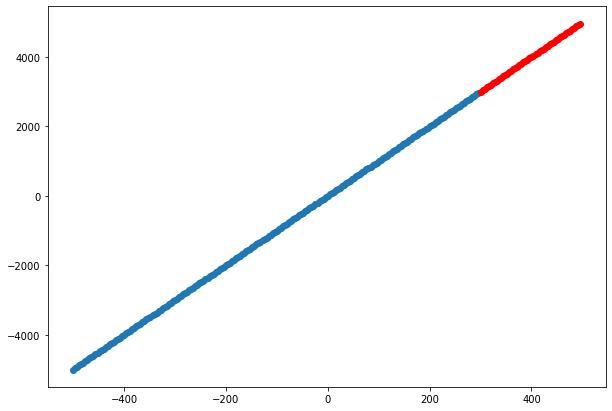

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c = 'r')

# Model 1

*   Two Dense layers with 10, 1 neurons respectively

*   Loss: mae (mean absolute error)

*   Optimizer: Adam with default learning rate


In [ ]:
# Import model and layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

model1 = Sequential()
model1.add(Dense(10))
model1.add(Dense(1))

model1.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics=('mae'))

model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 2046.9202 - mae: 2046.9202
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 2036.7997 - mae: 2036.7997
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 2026.4979 - mae: 2026.4979
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 2016.1196 - mae: 2016.1196
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 2005.4900 - mae: 2005.4900
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1995.2047 - mae: 1995.2047
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1984.3486 - mae: 1984.3486
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1973.5336 - mae: 1973.5336
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1962.1489 - mae: 1962.1489
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1951.0079 - mae: 1951.0079
Epoch 11/100
7/7 [=

In [ ]:
# Model Summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predict1 = model1.predict(X_test)


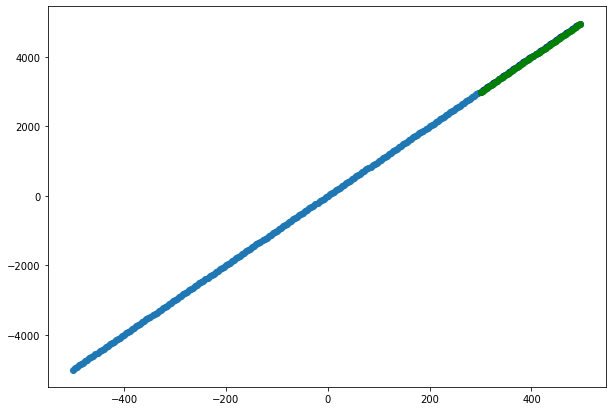

In [ ]:
#Plot with train and test data
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c = 'b')
plt.scatter(X_test, y_predict1, c = 'g')

In [ ]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 9.8282 - mae: 9.8282


[9.82821273803711, 9.82821273803711]

In [ ]:
model1.predict([5000])

array([[49929.43]], dtype=float32)

In [ ]:
# Error and Error percentage
error = (5000*10) - 49929.43
error, (error/(5000*10))*100

(70.56999999999971, 0.1411399999999994)

In [ ]:
model1.predict([50000])

array([[499335.5]], dtype=float32)

In [ ]:
# Error and Error percentage
error = (50000*10) - 499335.5
error, (error/(50000*10))*100

(664.5, 0.13290000000000002)

# Model2

*   Three Dense layers with 25, 10, 1 neurons respectively

*   Loss: mae (mean absolute error)

*   Optimizer: Adam with default learning rate



In [ ]:
#Model2
tf.random.set_seed(42)

model2 = Sequential()
model2.add(Dense(25))
model2.add(Dense(10))
model2.add(Dense(1))

model2.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ('mae'))

model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 2025.0927 - mae: 2025.0927
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1984.7919 - mae: 1984.7919
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1943.1472 - mae: 1943.1472
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1900.0615 - mae: 1900.0615
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1854.2439 - mae: 1854.2439
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1807.7720 - mae: 1807.7720
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1755.9264 - mae: 1755.9264
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1700.8950 - mae: 1700.8950
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1638.7806 - mae: 1638.7806
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1573.3734 - mae: 1573.3734
Epoch 11/100
7/7 [=

In [ ]:
#Model2 summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 2.1473 - mae: 2.1473


[2.1473193168640137, 2.1473193168640137]

In [ ]:
y_predict2 = model2.predict(X_test)


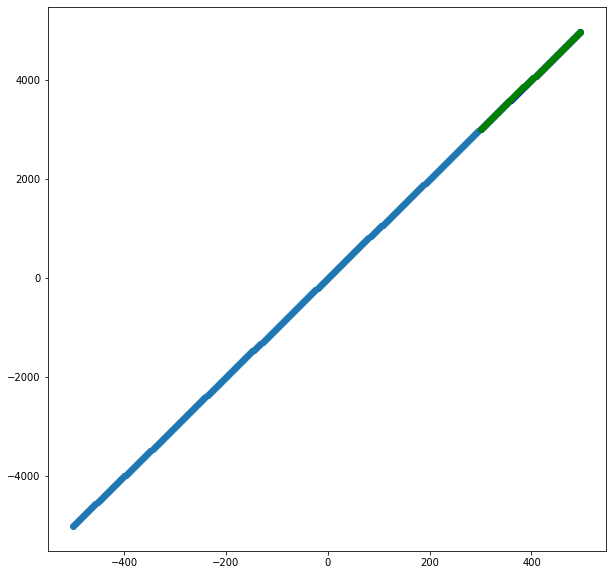

In [ ]:
#Plot with train and test data
plt.figure(figsize = (10,10))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c = 'b')
plt.scatter(X_test, y_predict2, c = 'g')

In [ ]:
model2.predict([5000])

array([[50027.363]], dtype=float32)

In [ ]:
# Error and Error percentage
error = (5000*10) - 50027.363
error, (error/(5000*10))*100

(-27.362999999997555, -0.05472599999999511)

In [ ]:
model2.predict([50000])

array([[500273.97]], dtype=float32)

In [ ]:
# Error and Error percentage
error = (50000*10) - 500273.97
error, (error/(50000*10))*100

(-273.96999999997206, -0.05479399999999441)